In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
sns.set(style='whitegrid')

In [2]:
df = pd.read_csv('MyUberDrives2016.csv')
df.head(5)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [3]:
df.columns = df.columns.str.replace("*","")

In [4]:
df.shape

(1156, 7)

In [5]:
df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [6]:
df['PURPOSE'] = df['PURPOSE'].fillna('Unknown')
df.columns = df.columns.str.lower()

In [7]:
df.isnull().sum()

start_date    0
end_date      1
category      1
start         1
stop          1
miles         0
purpose       0
dtype: int64

In [8]:
df.head(3)

,start_date,end_date,category,start,stop,miles,purpose
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,Unknown
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies


In [9]:
df.describe(include='all')

,start_date,end_date,category,start,stop,miles,purpose
count,1156,1155,1155,1155,1155,1156.000000,1156
unique,1155,1154,2,177,188,NaN,11
top,6/28/2016 23:34,6/28/2016 23:59,Business,Cary,Cary,NaN,Unknown
freq,2,2,1078,201,203,NaN,503
mean,NaN,NaN,NaN,NaN,NaN,21.115398,NaN
std,NaN,NaN,NaN,NaN,NaN,359.299007,NaN
min,NaN,NaN,NaN,NaN,NaN,0.500000,NaN
25%,NaN,NaN,NaN,NaN,NaN,2.900000,NaN
50%,NaN,NaN,NaN,NaN,NaN,6.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,10.400000,NaN


In [10]:
df.head(5)

,start_date,end_date,category,start,stop,miles,purpose
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,Unknown
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [11]:
df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')
df['end_date'] = pd.to_datetime(df['end_date'], errors='coerce')
df['hour'] = df['start_date'].dt.hour
df['day'] = df['start_date'].dt.day_name()
df['month'] = df['start_date'].dt.month_name()

In [12]:
df.head(5)

,start_date,end_date,category,start,stop,miles,purpose,hour,day,month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21.0,Friday,January
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,1.0,Saturday,January
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20.0,Saturday,January
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17.0,Tuesday,January
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14.0,Wednesday,January


In [13]:
diff = df['end_date'] - df['start_date']
diff

0      0 days 00:06:00
1      0 days 00:12:00
2      0 days 00:13:00
3      0 days 00:14:00
4      0 days 01:07:00
             ...      
1151   0 days 00:18:00
1152   0 days 00:35:00
1153   0 days 00:18:00
1154   0 days 01:43:00
1155               NaT
Length: 1156, dtype: timedelta64[ns]

In [14]:
diff.dt.total_seconds()/60

0         6.0
1        12.0
2        13.0
3        14.0
4        67.0
        ...  
1151     18.0
1152     35.0
1153     18.0
1154    103.0
1155      NaN
Length: 1156, dtype: float64

In [15]:
df['duration_min'] = (diff.dt.total_seconds()/60).fillna(0).astype('int')
df.head(3)

,start_date,end_date,category,start,stop,miles,purpose,hour,day,month,duration_min
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21.0,Friday,January,6
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,1.0,Saturday,January,12
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20.0,Saturday,January,13


In [16]:
hourly = df.groupby('hour')['duration_min'].agg(['count', 'mean']).reset_index()
hourly.columns = ['Hour', 'Trip Count', 'Average Duration']
hourly.head(4)

,Hour,Trip Count,Average Duration
0,0.0,19,13.894737
1,1.0,5,18.400000
2,2.0,2,73.500000
3,3.0,3,25.000000


# Number of Trips per hour of day

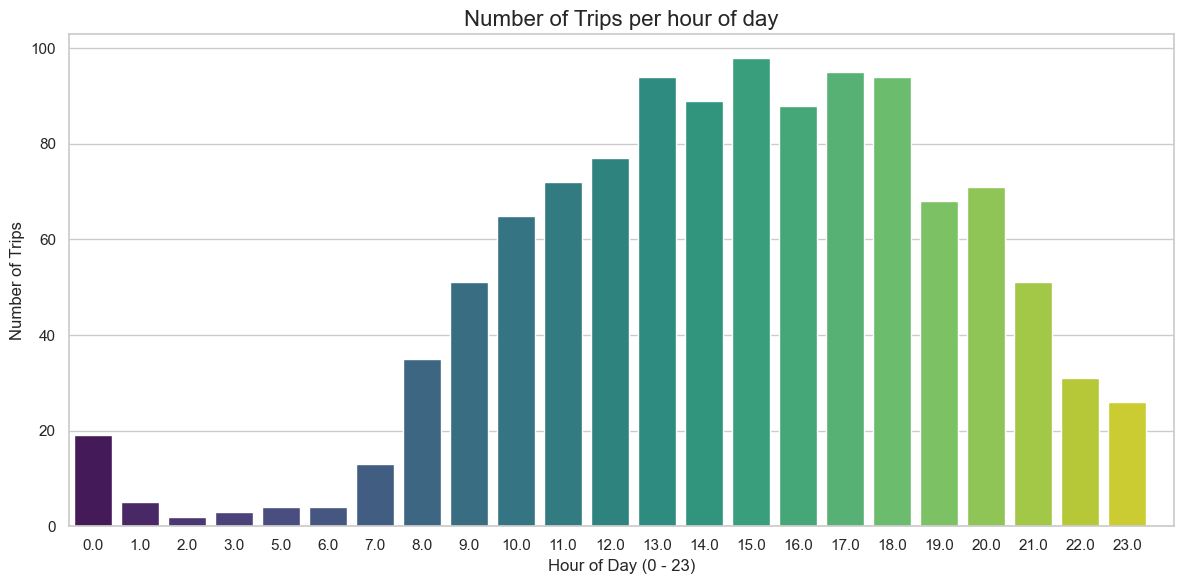

In [17]:
grouped = df.groupby('hour').size().reset_index(name='Trips').sort_values('hour')
plt.figure(figsize=(12,6))
sns.barplot(x='hour', y='Trips', data=grouped, palette='viridis')
plt.title('Number of Trips per hour of day', fontsize=16)
plt.xlabel('Hour of Day (0 - 23)', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.xticks(range(0,24))
plt.tight_layout()
plt.show()

# Average Duration Per Hour

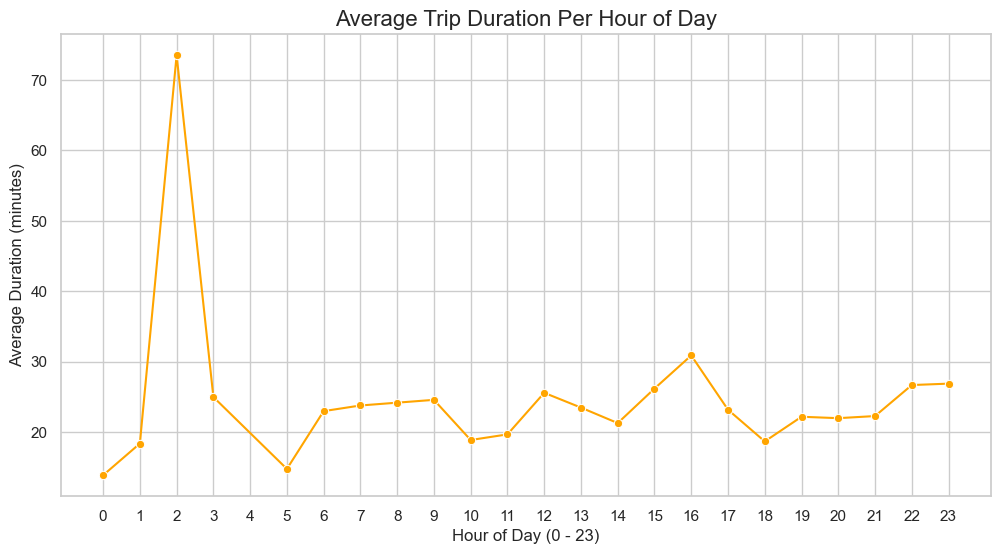

In [18]:
av = df.groupby('hour')['duration_min'].mean().reset_index(name='avg_dur').sort_values('hour')
av['avg_dur'] = av['avg_dur'].round(1)
plt.figure(figsize=(12,6))
sns.lineplot(x='hour', y='avg_dur', data=av, marker='o', color='orange')
plt.title('Average Trip Duration Per Hour of Day', fontsize=16)
plt.xlabel('Hour of Day (0 - 23)', fontsize=12)
plt.ylabel('Average Duration (minutes)', fontsize=12)
plt.xticks(range(0,24))
plt.show()

# Trips By Day of Week

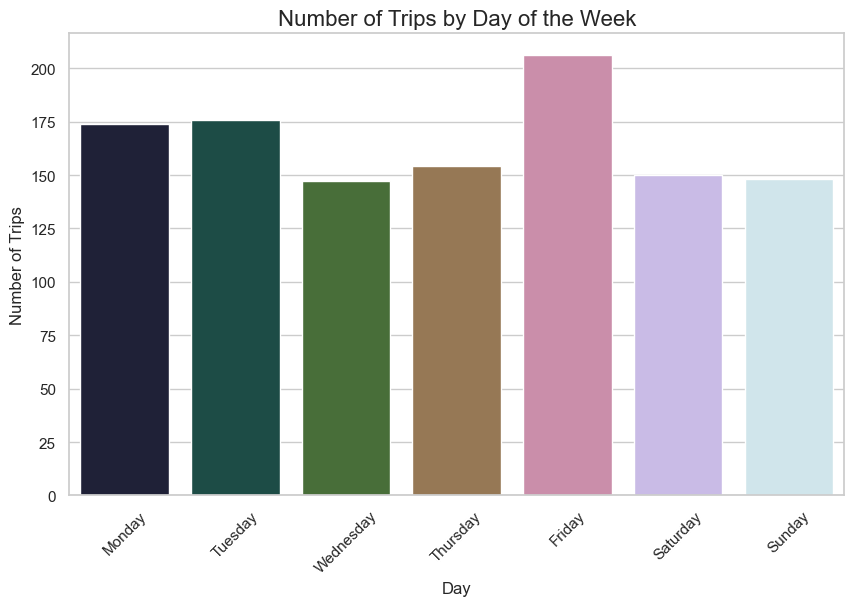

In [19]:
day_order = ['Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
trips = df['day'].value_counts().reindex(day_order).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='day', y='count', data=trips, palette='cubehelix')
plt.title('Number of Trips by Day of the Week', fontsize=16)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Number of Trips By Month

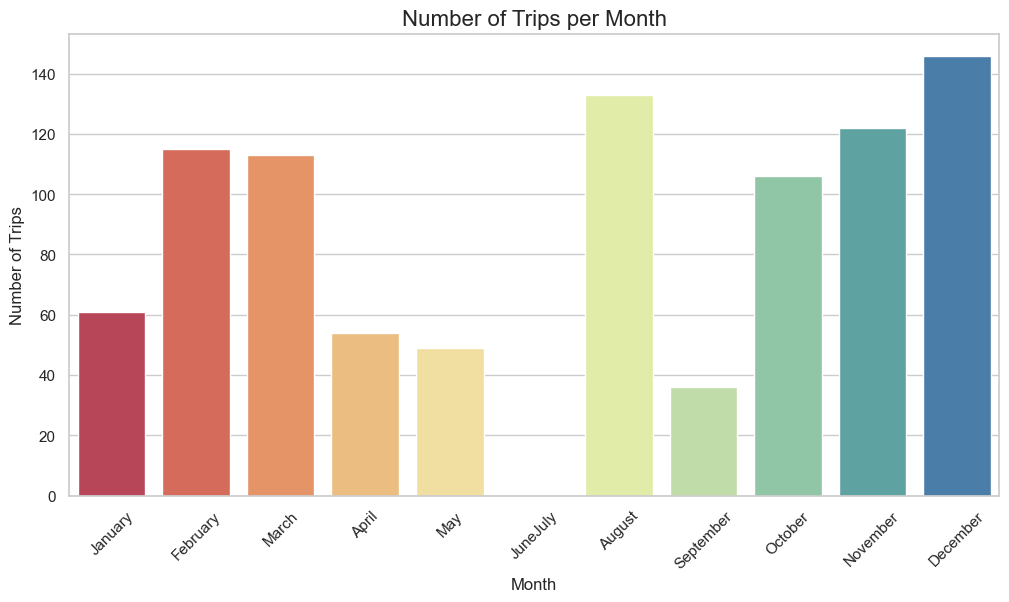

In [20]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June'
               'July', 'August','September', 'October','November', 'December']
month_trip = df['month'].value_counts().reindex(month_order).reset_index()
plt.figure(figsize=(12,6))
sns.barplot(x='month',y='count', data=month_trip, palette='Spectral')
plt.title('Number of Trips per Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Weekday vs Weekend

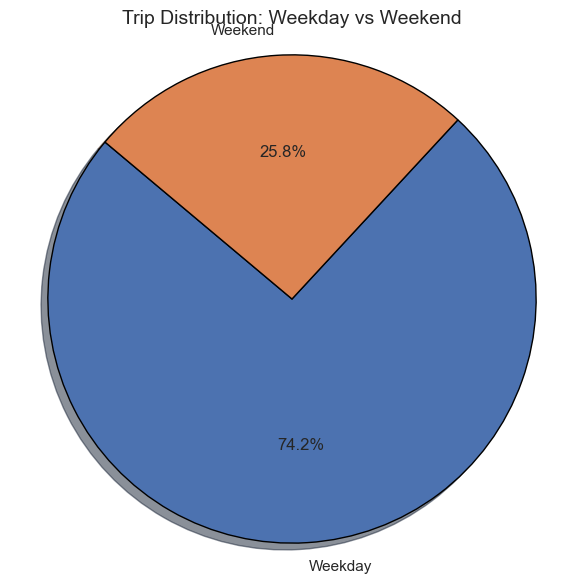

In [21]:
df['day_type'] = df['day'].apply(lambda x:'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')
result = df.groupby('day_type').size().reset_index(name='Count')
labels = result['day_type']
sizes = result['Count']
plt.figure(figsize=(6, 6))
plt.pie(sizes,labels=labels,autopct='%1.1f%%',startangle=140,wedgeprops={'edgecolor': 'black'},shadow=True)
plt.title('Trip Distribution: Weekday vs Weekend', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()

# Top Pickup and Drop-off Zone

In [22]:
df['start'].value_counts().head(10)

start
Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Durham               37
Lahore               36
Raleigh              28
Kar?chi              27
Westpark Place       17
Name: count, dtype: int64

In [23]:
df['start'] = df['start'].replace('Kar?chi','Karachi')
df['stop'] = df['stop'].replace('Kar?chi','Karachi')

In [24]:
top_pickup_zone = df['start'].value_counts().head(10).reset_index()
top_dropoff_zone = df['stop'].value_counts().head(10).reset_index()

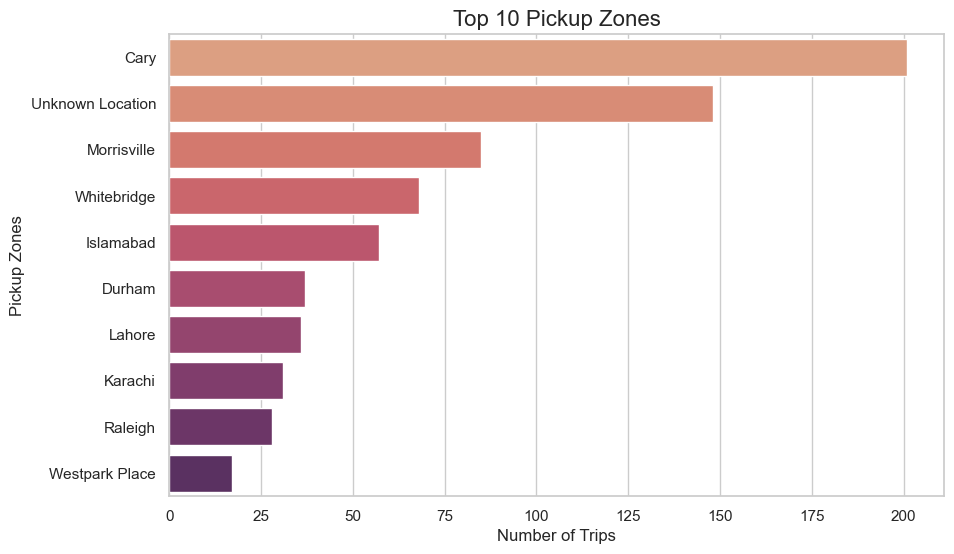

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(x='count', y='start', data = top_pickup_zone, palette='flare')
plt.title('Top 10 Pickup Zones', fontsize=16)
plt.xlabel('Number of Trips', fontsize=12)
plt.ylabel('Pickup Zones', fontsize=12)
plt.show()

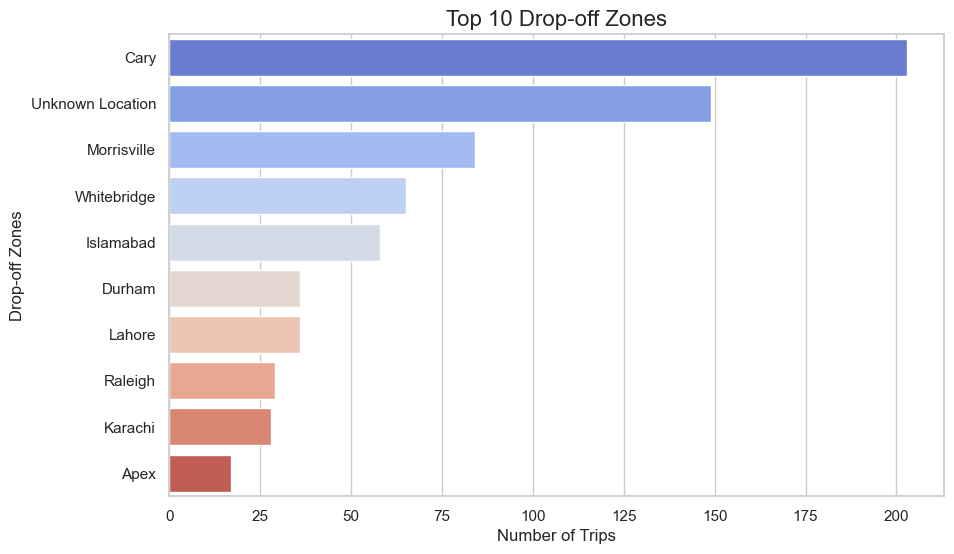

In [26]:
plt.figure(figsize=(10,6))
sns.barplot(x='count', y='stop', data = top_dropoff_zone, palette='coolwarm')
plt.title('Top 10 Drop-off Zones', fontsize=16)
plt.xlabel('Number of Trips', fontsize=12)
plt.ylabel('Drop-off Zones', fontsize=12)
plt.show()

# Lahore Trips Day by Day

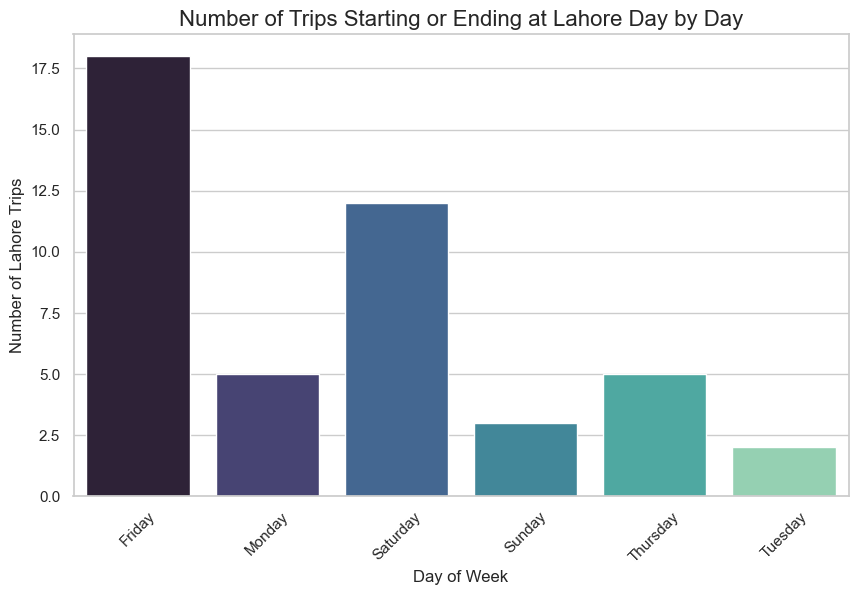

In [27]:
lah = df[(df['start'] == 'Lahore') | (df['stop']=='Lahore')]
lahore_trips = lah.groupby('day').size().reset_index(name='Lahore Trips')
plt.figure(figsize=(10,6))
sns.barplot(x='day', y='Lahore Trips', data=lahore_trips, palette='mako')
plt.title('Number of Trips Starting or Ending at Lahore Day by Day', fontsize=16)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Number of Lahore Trips', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Distribution of Trip Datasets

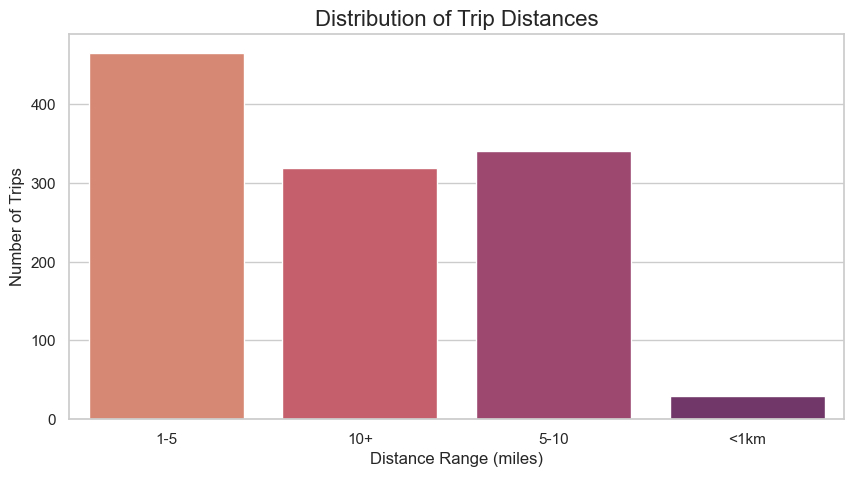

In [28]:
conditions = [
    (df['miles'] < 1),
    (df['miles'] >=1) & (df['miles'] < 5),
    (df['miles'] >=5) & (df['miles'] < 10),
    (df['miles'] >= 10)
]
labels = ['<1km', '1-5', '5-10', '10+']
df['dist_range'] = np.select(conditions, labels, default='Unknown')
result = df.groupby('dist_range').size().reset_index(name='trips')
plt.figure(figsize=(10,5))
sns.barplot(x='dist_range', y='trips', data=result, palette='flare')
plt.title('Distribution of Trip Distances', fontsize=16)
plt.xlabel('Distance Range (miles)', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.show()

In [29]:
# Short vs Long Distance
print(f'The Minimum Duration Min is:{df['duration_min'].min()}')
print(f'The Maximum Duration Min is :{df['duration_min'].max()}')

The Minimum Duration Min is:0
The Maximum Duration Min is :336


In [30]:
df.head(4)

,start_date,end_date,category,start,stop,miles,purpose,hour,day,month,duration_min,day_type,dist_range
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21.0,Friday,January,6,Weekday,5-10
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,1.0,Saturday,January,12,Weekend,5-10
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20.0,Saturday,January,13,Weekend,1-5
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17.0,Tuesday,January,14,Weekday,1-5


# Longest trip each day

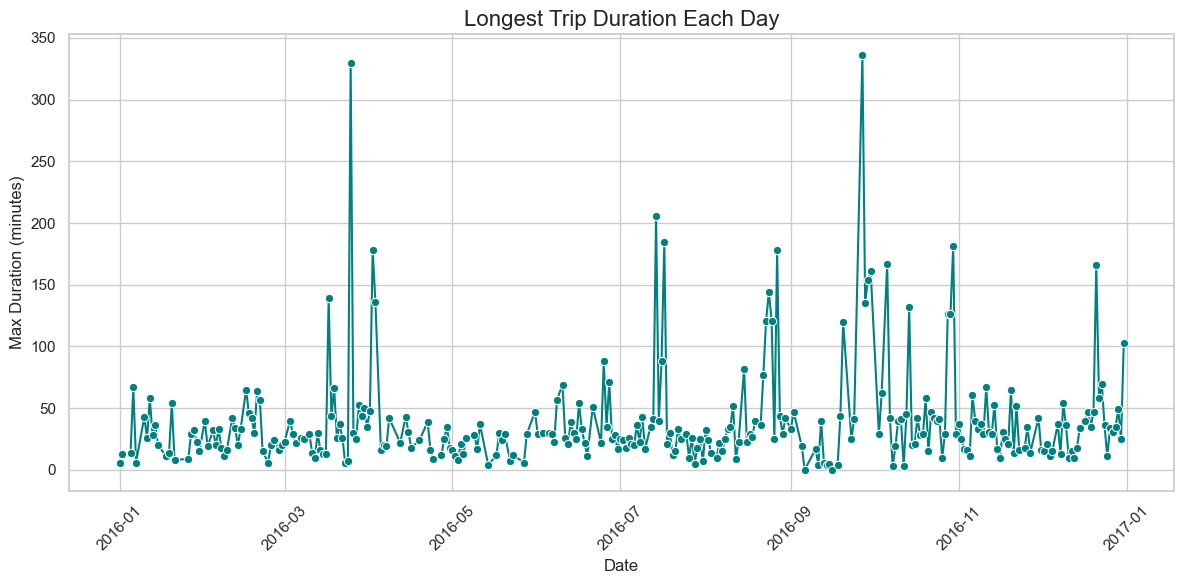

In [33]:
df['trip_day'] = df['start_date'].dt.date
result = df.groupby('trip_day')['duration_min'].max().reset_index(name='max_duration')
plt.figure(figsize=(12,6))
sns.lineplot(x='trip_day', y='max_duration', data=result, marker='o', color='teal')
plt.title('Longest Trip Duration Each Day', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Max Duration (minutes)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Trip Distribution By Hour Bucket

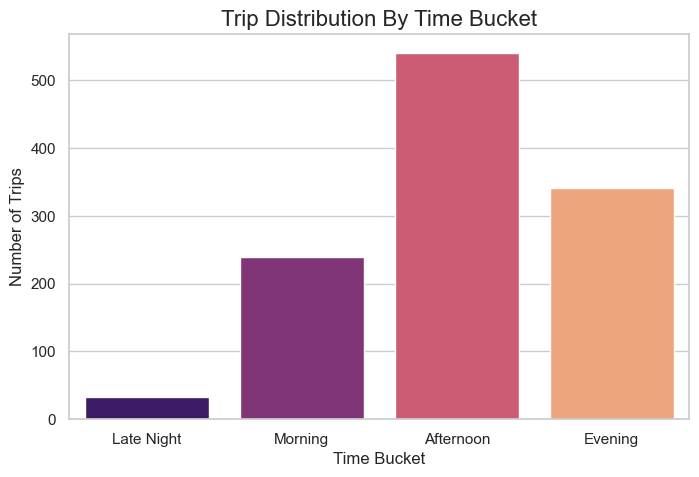

In [34]:
conditions=[
    df['hour'].between(0,5),
    df['hour'].between(6,11),
    df['hour'].between(12,17),
    df['hour'].between(18,23)
]
choices = ['Late Night', 'Morning', 'Afternoon','Evening']
df['time_bucket'] = np.select(conditions, choices, default='Unknown')
result = df.groupby('time_bucket').size().reset_index(name='trip_count')
plt.figure(figsize=(8,5))
sns.barplot(x='time_bucket',y='trip_count',data=result, order=choices, palette='magma')
plt.title('Trip Distribution By Time Bucket', fontsize=16)
plt.xlabel('Time Bucket', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.show()

# Average Duration per Day-of-Week

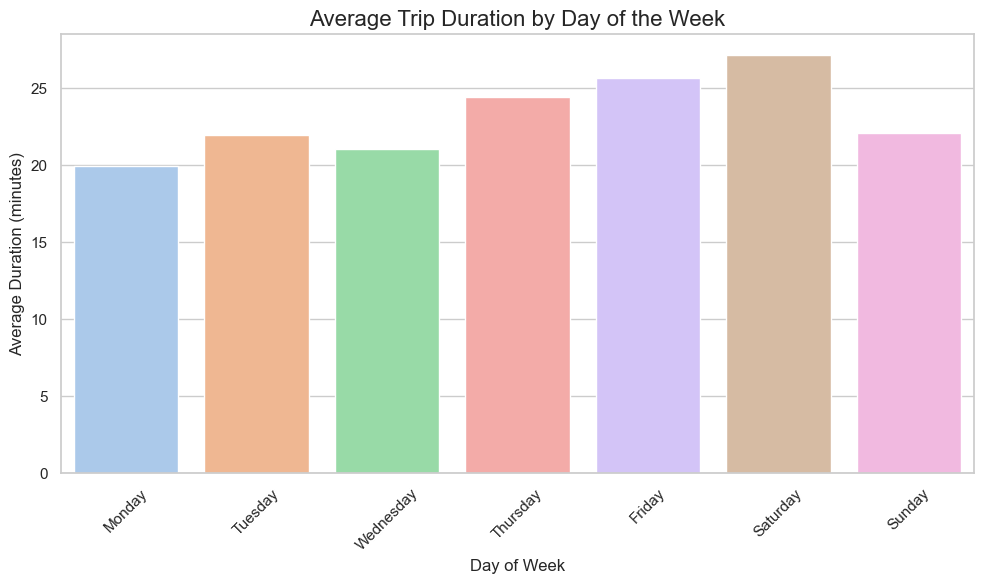

In [35]:
avg_dur_day = df.groupby('day')['duration_min'].mean().reset_index()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(10,6))
sns.barplot(x='day', y='duration_min', data=avg_dur_day, order=day_order, palette='pastel')
plt.title('Average Trip Duration by Day of the Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Average Duration (minutes)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Most Commong Pickup and Drop-off Pairs

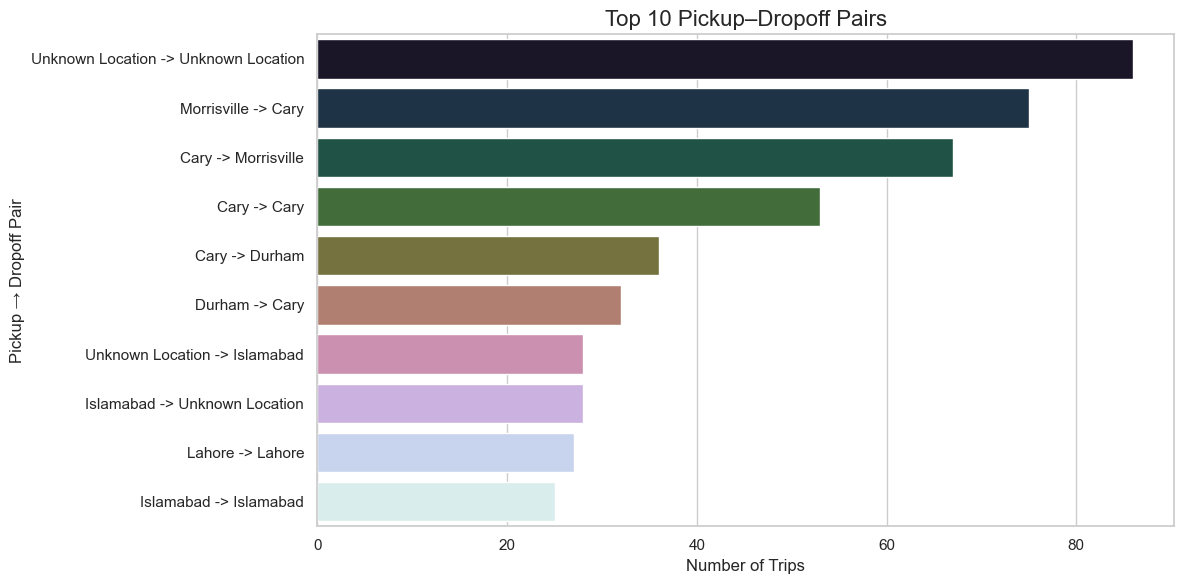

In [39]:
top_pairs = df.groupby(['start','stop']).size().reset_index(
    name='trips').sort_values('trips',ascending=False).head(10)
top_pairs['pair'] = top_pairs['start'] + ' -> ' + top_pairs['stop']
plt.figure(figsize=(12,6))
sns.barplot(x='trips', y='pair',data=top_pairs, palette='cubehelix')
plt.title('Top 10 Pickup–Dropoff Pairs', fontsize=16)
plt.xlabel('Number of Trips', fontsize=12)
plt.ylabel('Pickup → Dropoff Pair', fontsize=12)
plt.tight_layout()
plt.show()

# Number of Trips within Same Zone

In [40]:
df[df['start'] == df['stop']].shape[0]

288

In [41]:
df.describe(include='all')

,start_date,end_date,category,start,stop,miles,purpose,hour,day,month,duration_min,day_type,dist_range,trip_day,time_bucket
count,1155,1155,1155,1155,1155,1156.000000,1156,1155.000000,1155,1155,1156.000000,1156,1156,1155,1156
unique,NaN,NaN,2,176,187,NaN,11,NaN,7,12,NaN,2,4,294,5
top,NaN,NaN,Business,Cary,Cary,NaN,Unknown,NaN,Friday,December,NaN,Weekday,1-5,2016-12-29,Afternoon
freq,NaN,NaN,1078,201,203,NaN,503,NaN,206,146,NaN,858,466,13,541
mean,2016-07-16 23:44:33.402597376,2016-07-17 00:07:47.999999744,NaN,NaN,NaN,21.115398,NaN,14.696104,NaN,NaN,23.223183,NaN,NaN,NaN,NaN
min,2016-01-01 21:11:00,2016-01-01 21:17:00,NaN,NaN,NaN,0.500000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,2016-04-01 02:10:00,2016-04-01 02:35:00,NaN,NaN,NaN,2.900000,NaN,12.000000,NaN,NaN,10.000000,NaN,NaN,NaN,NaN
50%,2016-07-21 17:17:00,2016-07-21 17:23:00,NaN,NaN,NaN,6.000000,NaN,15.000000,NaN,NaN,16.000000,NaN,NaN,NaN,NaN
75%,2016-10-27 21:06:30,2016-10-27 21:21:00,NaN,NaN,NaN,10.400000,NaN,18.000000,NaN,NaN,27.250000,NaN,NaN,NaN,NaN
max,2016-12-31 22:08:00,2016-12-31 23:51:00,NaN,NaN,NaN,12204.700000,NaN,23.000000,NaN,NaN,336.000000,NaN,NaN,NaN,NaN


# Monthly Trip Distribution

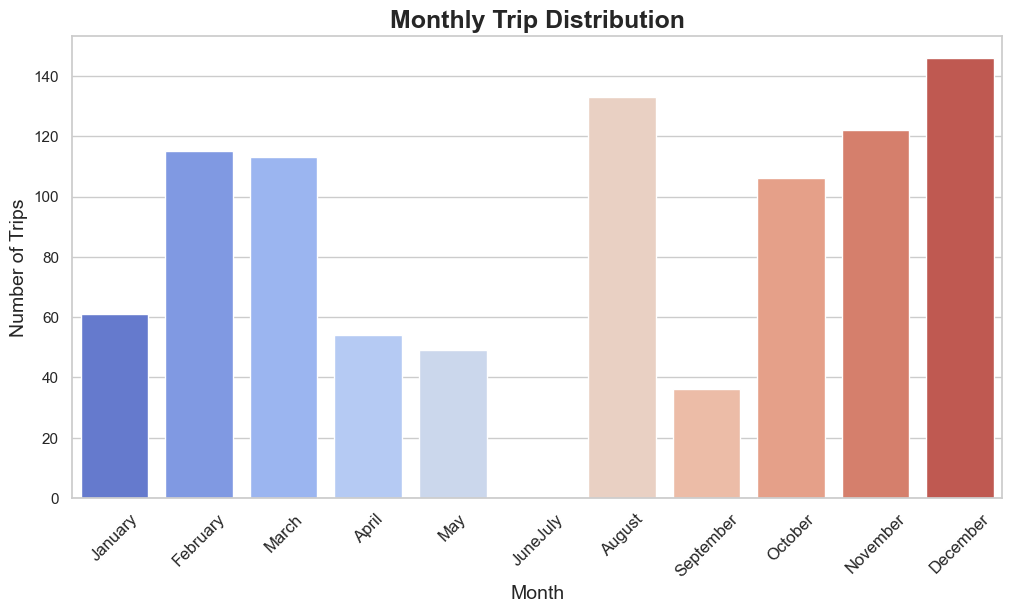

In [44]:
plt.figure(figsize=(12,6))
sns.countplot(x='month',data=df,order=month_order, palette='coolwarm')
plt.title("Monthly Trip Distribution", fontsize=18, fontweight='bold')
plt.xlabel("Month", fontsize=14)
plt.ylabel("Number of Trips", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.show()

# Average Trip Duration By Hour

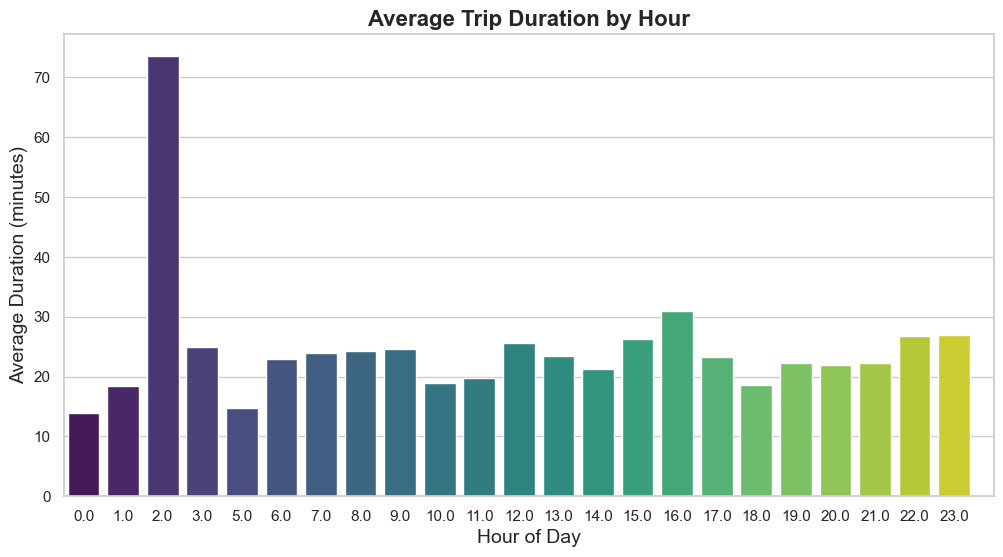

In [46]:
plt.figure(figsize=(12,6))
sns.barplot(x='hour', y='duration_min', data=df, estimator='mean', ci=None, palette='viridis')
plt.title("Average Trip Duration by Hour", fontsize=16, fontweight='bold')
plt.xlabel("Hour of Day", fontsize=14)
plt.ylabel("Average Duration (minutes)", fontsize=14)
plt.xticks(range(0,24))
plt.show()

# Heatmap : Day vs Hour

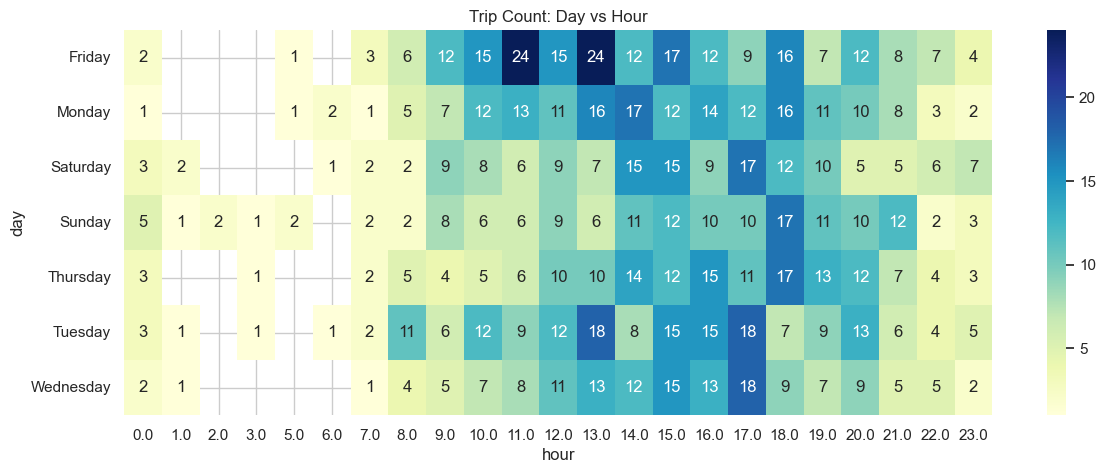

In [47]:
plt.figure(figsize=(14,5))
pivot = df.pivot_table(index='day', columns='hour', values='duration_min', aggfunc='count')
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt='g')
plt.title("Trip Count: Day vs Hour")
plt.show()

# Trip Duration Distribution

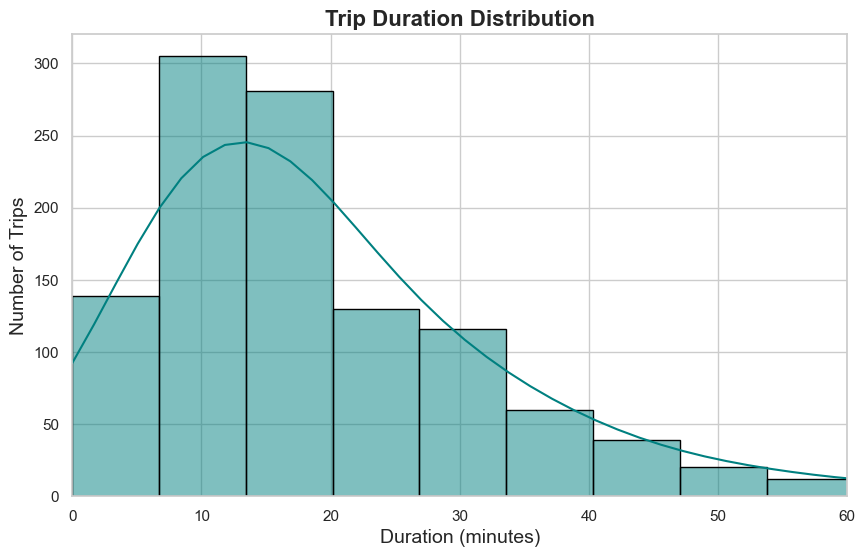

In [48]:
plt.figure(figsize=(10,6))
sns.histplot(df['duration_min'], bins=50, kde=True, color='teal', edgecolor='black')
plt.title("Trip Duration Distribution", fontsize=16, fontweight='bold')
plt.xlabel("Duration (minutes)", fontsize=14)
plt.ylabel("Number of Trips", fontsize=14)
plt.xlim(0, 60)
plt.show()

# Same Pickup and Drop-off Zones

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Unknown Location'),
  Text(1, 0, 'Cary'),
  Text(2, 0, 'Lahore'),
  Text(3, 0, 'Islamabad'),
  Text(4, 0, 'Karachi'),
  Text(5, 0, 'Whitebridge'),
  Text(6, 0, 'Colombo'),
  Text(7, 0, 'Banner Elk'),
  Text(8, 0, 'Morrisville'),
  Text(9, 0, 'Covington')])

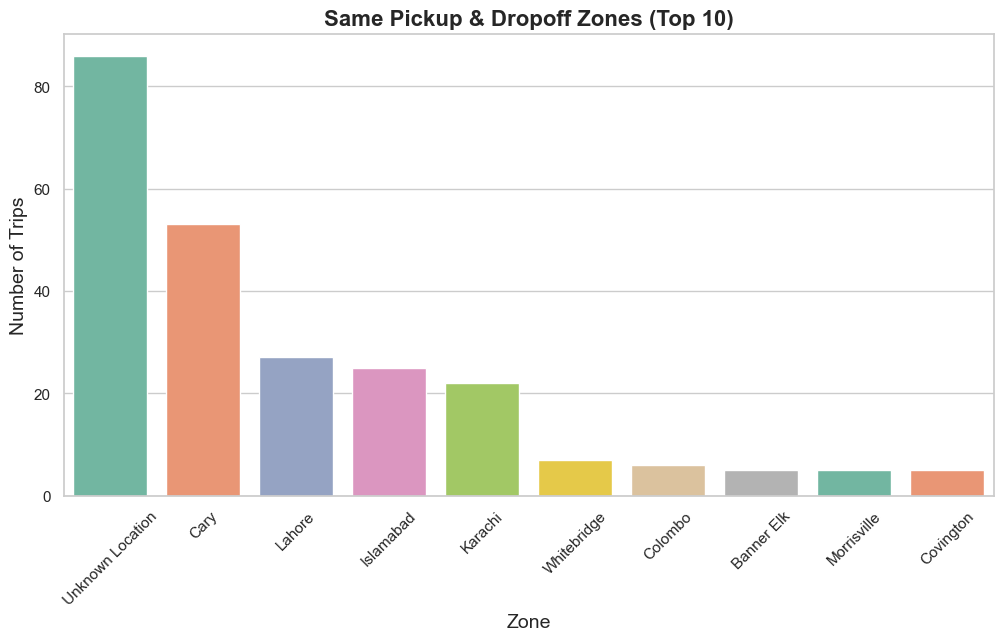

In [50]:
same_zone = df[df['start'] == df['stop']]
top_zones = same_zone['start'].value_counts().head(10).index

plt.figure(figsize=(12,6))
ax = sns.countplot(x='start', data=same_zone, order=top_zones, palette='Set2')

plt.title("Same Pickup & Dropoff Zones (Top 10)", fontsize=16, fontweight='bold')
plt.xlabel("Zone", fontsize=14)
plt.ylabel("Number of Trips", fontsize=14)
plt.xticks(rotation=45)

# Duration by Day

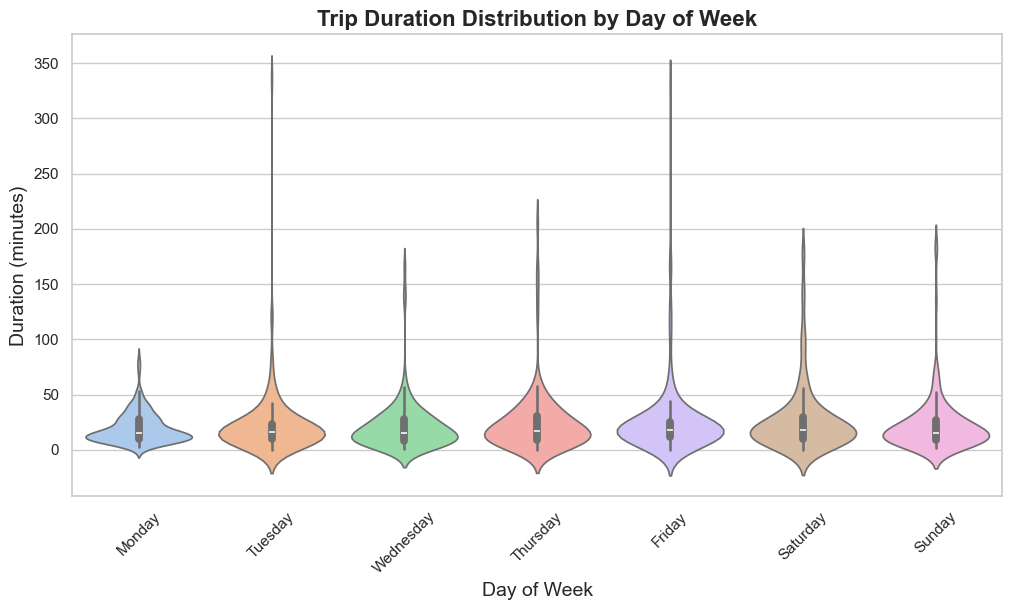

In [54]:
plt.figure(figsize=(12,6))
sns.violinplot(x='day', y='duration_min', data=df, order=day_order, palette='pastel')
plt.title("Trip Duration Distribution by Day of Week", fontsize=16, fontweight='bold')
plt.xlabel("Day of Week", fontsize=14)
plt.ylabel("Duration (minutes)", fontsize=14)
plt.xticks(rotation=45)
plt.show()

# Trip Category Distribution

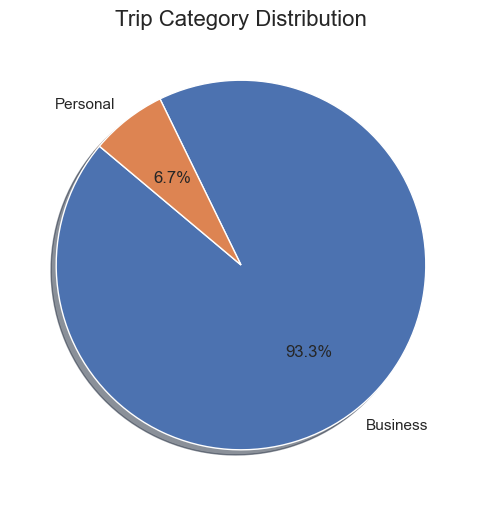

In [59]:
cat_count = df['category'].value_counts().reset_index()
total_trips = cat_count['count'].sum()
cat_count['percentage'] = (cat_count['count']/total_trips) * 100
plt.figure(figsize=(6,6))
plt.pie(cat_count['count'], labels=cat_count['category'], autopct="%1.1f%%", startangle=140, shadow=True)
plt.title('Trip Category Distribution', fontsize=16)
plt.show()

# Trips Count By Category

NameError: name 'category_counts' is not defined

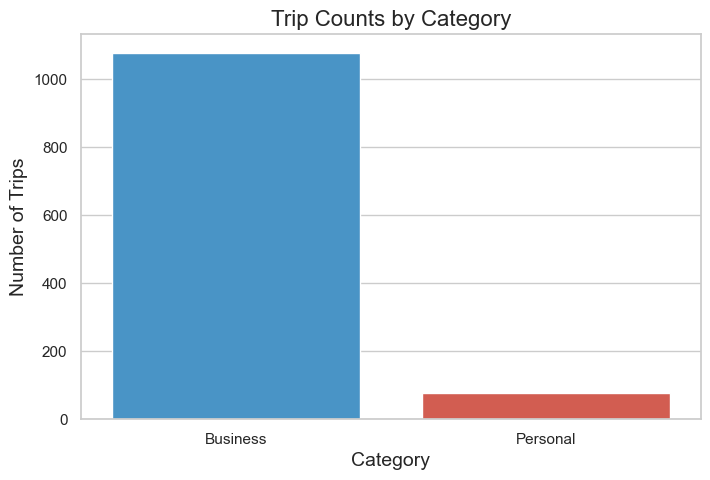

In [62]:
plt.figure(figsize=(8,5))
sns.barplot(x='category', y='count', data=cat_count,palette=['#3498db', '#e74c3c'])
plt.title('Trip Counts by Category', fontsize=16)
plt.ylabel('Number of Trips', fontsize=14)
plt.xlabel('Category', fontsize=14)
for index, row in category_counts.iterrows():
    plt.text(index, row['Count'] + 20, f"{row['Count']}", ha='center', fontsize=12)
plt.tight_layout()
plt.show()

# Average Duration By Category

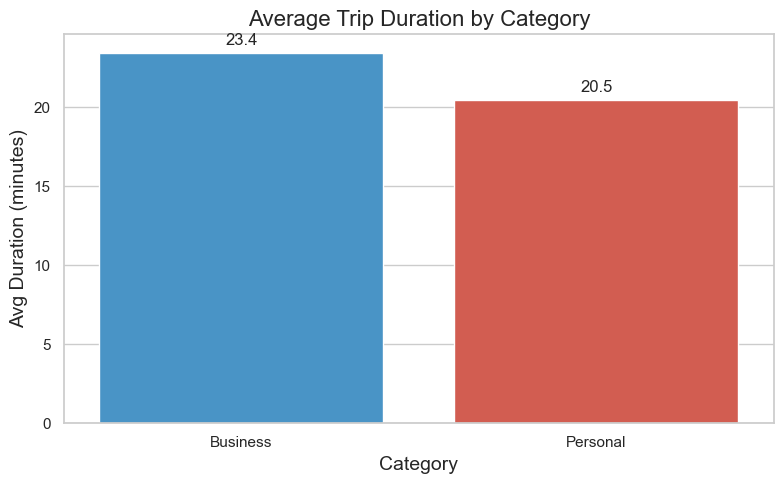

In [63]:
avg_duration = df.groupby('category')['duration_min'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(x='category', y='duration_min', data=avg_duration, palette=['#3498db', '#e74c3c'])
plt.title('Average Trip Duration by Category', fontsize=16)
plt.ylabel('Avg Duration (minutes)', fontsize=14)
plt.xlabel('Category', fontsize=14)
for index, row in avg_duration.iterrows():
    plt.text(index, row['duration_min'] + 0.5, f"{row['duration_min']:.1f}", ha='center', fontsize=12)

plt.tight_layout()
plt.show()

# Count Trips by Category and Day

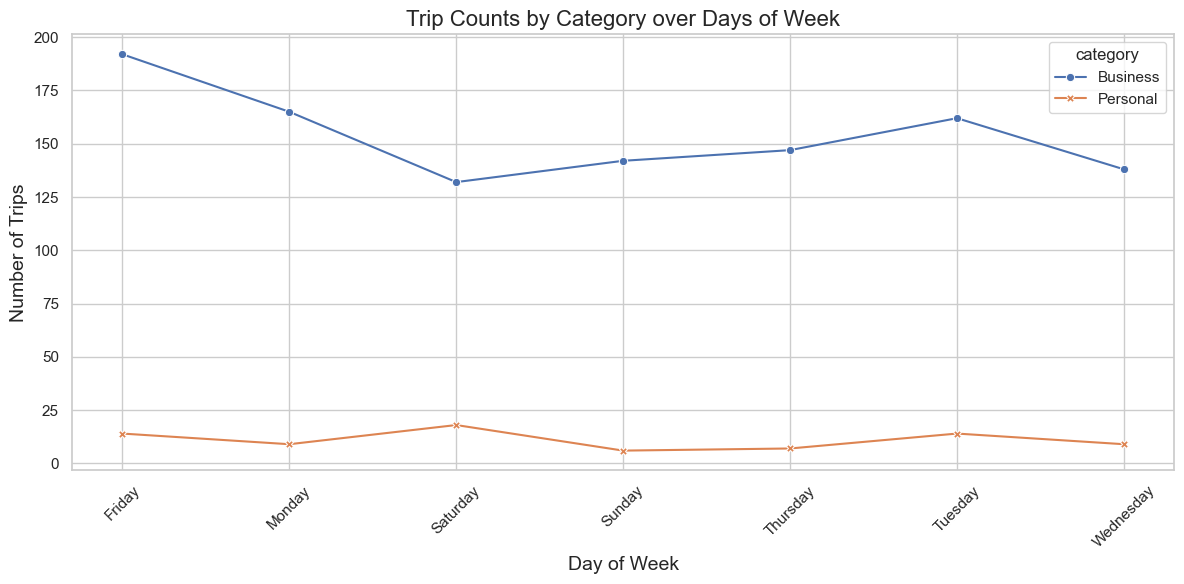

In [65]:
cat_day = df.groupby(['category','day']).size().reset_index(name='trip_count')
plt.figure(figsize=(12,6))
sns.lineplot(data=cat_day, x='day', y='trip_count', hue='category', style='category', markers=True,
            dashes=False, hue_order=['Business', 'Personal'], sort=False)
plt.title('Trip Counts by Category over Days of Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Number of Trips', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Average Trip Duration by Category and Hour

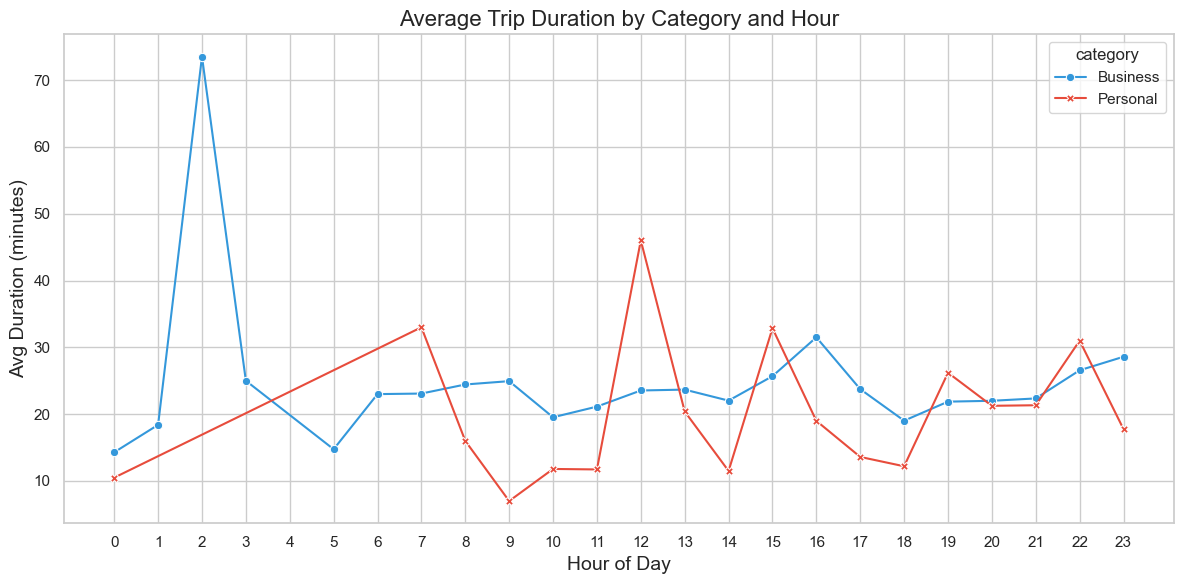

In [66]:
avg_duration_hour = df.groupby(['category','hour'])['duration_min'].mean().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(x='hour', y='duration_min',data=avg_duration_hour, hue='category',style='category',
            markers=True, dashes=False,palette=['#3498db', '#e74c3c'])
plt.title('Average Trip Duration by Category and Hour', fontsize=16)
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Avg Duration (minutes)', fontsize=14)
plt.xticks(range(0,24))
plt.tight_layout()
plt.show()

# T-Test

In [69]:
from scipy.stats import ttest_ind
business_dur = df[df['category']=='Business']['duration_min'].dropna()
personal_dur = df[df['category']=='Personal']['duration_min'].dropna()

t_stat, p_value = ttest_ind(business_dur,personal_dur,equal_var=False)
print(f'T-Test Results:\n t-statistic = {t_stat:.3f}, p-value={p_value:.4f}')
if p_value<0.5:
    print("=> Significant difference in average trip durations between Business and Personal")
else:
    print("=> No significant difference in average trip durations between Business and Personal")

T-Test Results:
 t-statistic = 1.039, p-value=0.3018
=> Significant difference in average trip durations between Business and Personal


# Heatmap of Trip Counts by Category and Day of Week

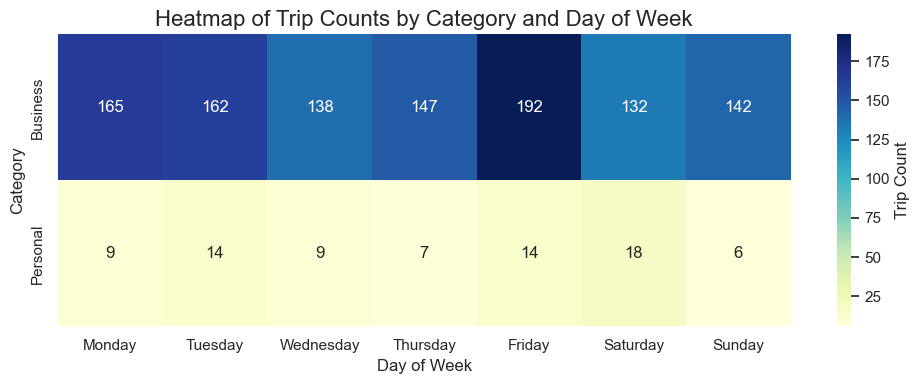

In [73]:
cat_day_counts = df.groupby(['category','day']).size().reset_index(name='trip_count')
cat_day_counts['day'] = pd.Categorical(cat_day_counts['day'], categories=day_order, ordered=True)
heatmap_data =cat_day_counts.pivot(index='category',columns='day',values='trip_count')
plt.figure(figsize=(10, 4))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Trip Count'})
plt.title('Heatmap of Trip Counts by Category and Day of Week', fontsize=16)
plt.xlabel('Day of Week')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

# Trip Distance Distribution by Category (Box Plot)

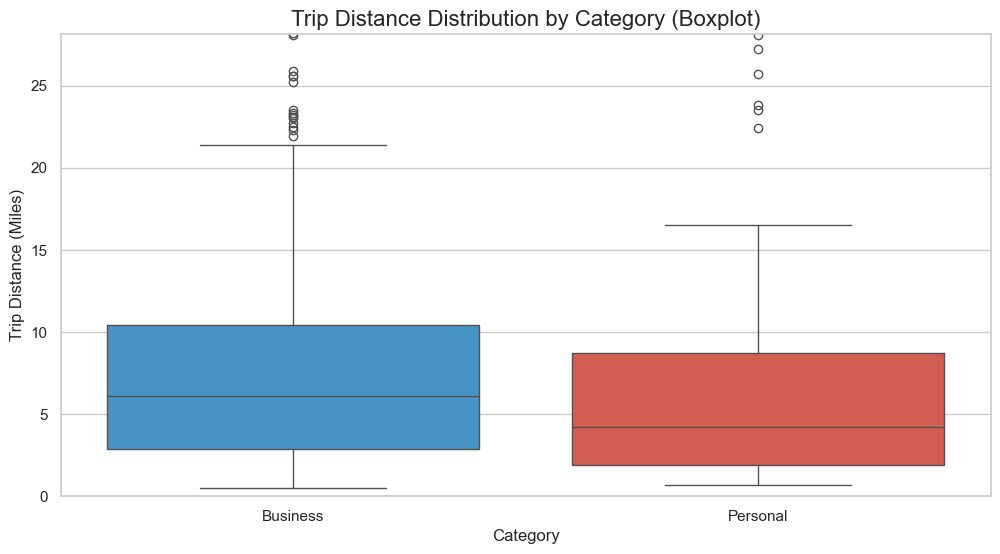

In [75]:
plt.figure(figsize=(12,6))

sns.boxplot(x='category', y='miles', data=df, palette=['#3498db', '#e74c3c'])
plt.title('Trip Distance Distribution by Category (Boxplot)', fontsize=16)
plt.ylabel('Trip Distance (Miles)')
plt.xlabel('Category')
plt.ylim(0, df['miles'].quantile(0.95))
plt.show()

# Trip Distance Distribution by Category (Violin Plot)

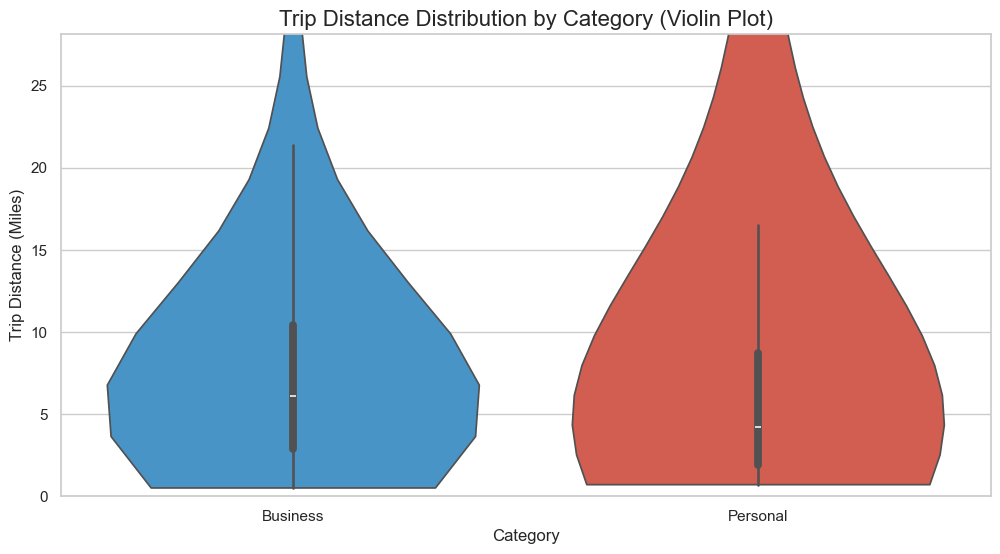

In [76]:
plt.figure(figsize=(12,6))
sns.violinplot(x='category', y='miles', data=df, palette=['#3498db', '#e74c3c'], cut=0)
plt.title('Trip Distance Distribution by Category (Violin Plot)', fontsize=16)
plt.ylabel('Trip Distance (Miles)')
plt.xlabel('Category')
plt.ylim(0, df['miles'].quantile(0.95))
plt.show()

# Outlier and Comparison

In [104]:
df['miles'].describe()

count     1156.000000
mean        21.115398
std        359.299007
min          0.500000
25%          2.900000
50%          6.000000
75%         10.400000
max      12204.700000
Name: miles, dtype: float64

In [79]:
outliers = df[df['miles'] > 100]
print(f"Number of trips with distance > 200 miles: {len(outliers)}")
outliers[['miles']].head(3)

Number of trips with distance > 200 miles: 17


,miles
232,136.0
268,144.0
269,310.3


In [81]:
filtered_outlier = df[df['miles'] <= 100]

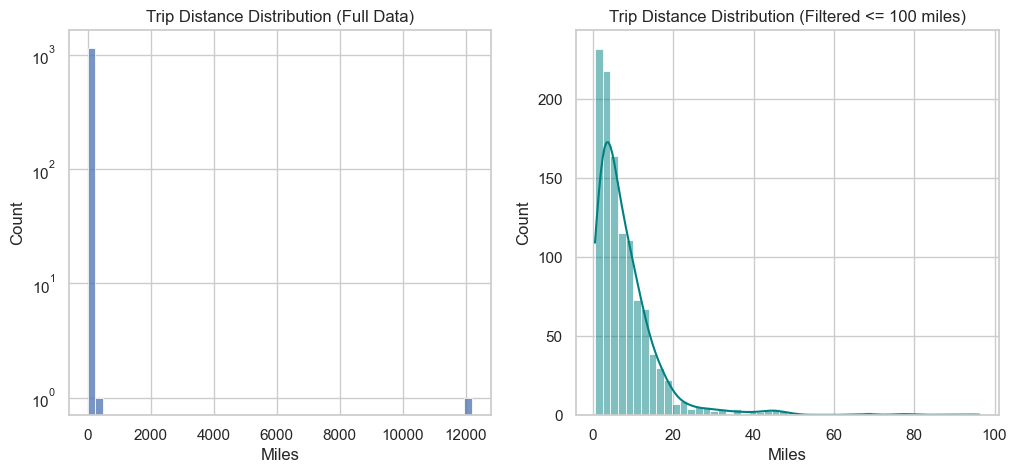

In [82]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['miles'],bins=50, kde=False)
plt.title('Trip Distance Distribution (Full Data)')
plt.xlabel('Miles')
plt.ylabel('Count')
plt.yscale('log')

plt.subplot(1,2,2)
sns.histplot(filtered_outlier['miles'], bins=50, kde=True, color='teal')
plt.title('Trip Distance Distribution (Filtered <= 100 miles)')
plt.xlabel('Miles')
plt.ylabel('Count')
plt.show()

# Distribution of Trip Distances (Outliers Replaced by Median)

In [83]:
df_clean = df[df['miles'] <= 100].copy()
df_clean['miles'].describe()

count    1139.000000
mean        8.389640
std         9.801798
min         0.500000
25%         2.800000
50%         5.900000
75%        10.400000
max        96.200000
Name: miles, dtype: float64

In [87]:
median_miles = df.loc[df['miles'] <= 100, 'miles'].median()
df['miles_cleaned'] = df['miles'].apply(lambda x: median_miles if x>100 else x)
df[['miles', 'miles_cleaned']].head(10)

,miles,miles_cleaned
0,5.1,5.1
1,5.0,5.0
2,4.8,4.8
3,4.7,4.7
4,63.7,63.7
5,4.3,4.3
6,7.1,7.1
7,0.8,0.8
8,8.3,8.3
9,16.5,16.5


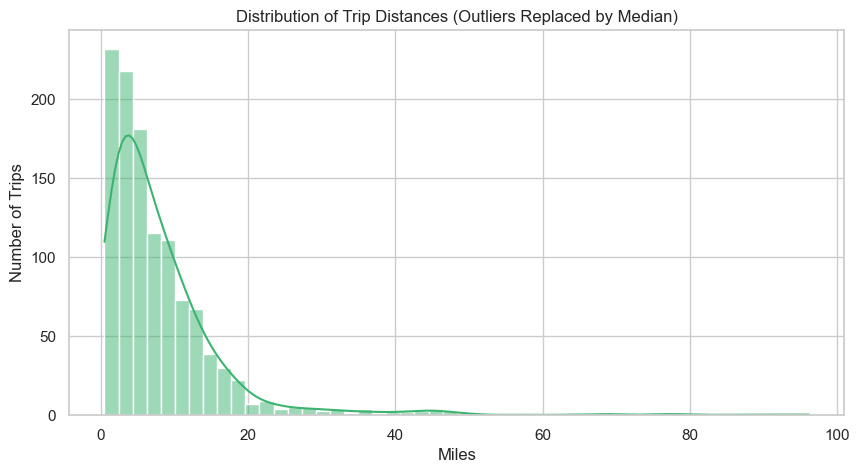

In [88]:
plt.figure(figsize=(10,5))
sns.histplot(df['miles_cleaned'], bins=50, kde=True, color='mediumseagreen')
plt.title('Distribution of Trip Distances (Outliers Replaced by Median)')
plt.xlabel('Miles')
plt.ylabel('Number of Trips')
plt.show()

# Trip Distance Distribution by Category (Cleaned Data)

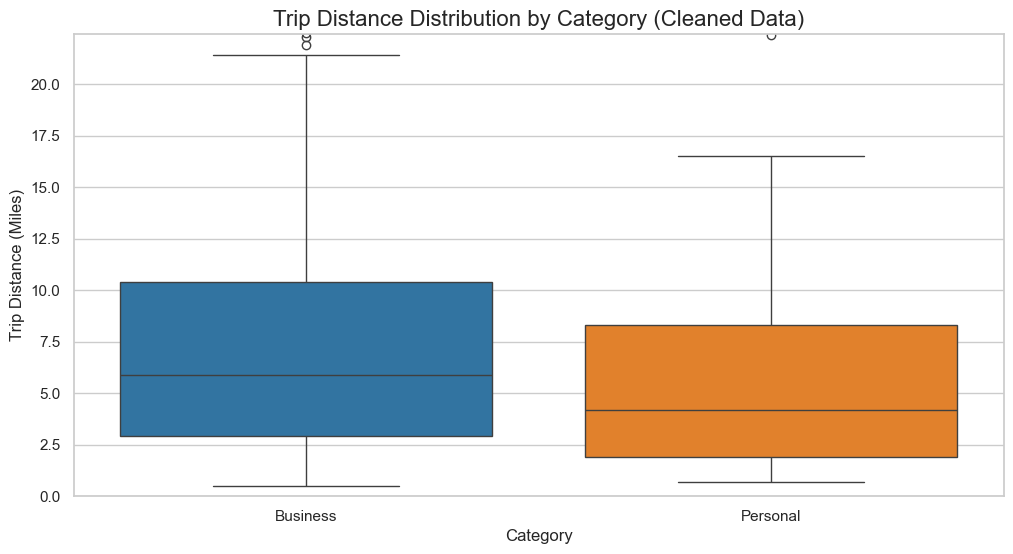

In [90]:
plt.figure(figsize=(12,6))
sns.boxplot(x='category', y='miles_cleaned', data=df, palette=['#1f77b4', '#ff7f0e'])
plt.title('Trip Distance Distribution by Category (Cleaned Data)', fontsize=16)
plt.ylabel('Trip Distance (Miles)')
plt.xlabel('Category')
plt.ylim(0, df['miles_cleaned'].quantile(0.95))
plt.show()

# Average Trip Distance by Hour and Category

In [92]:
distance_stats = df.groupby('category')['miles'].agg(['mean', 'median', 'std', 'count']).reset_index()
distance_stats

,category,mean,median,std,count
0,Business,10.655844,6.1,21.611405,1078
1,Personal,9.320779,4.2,21.220995,77


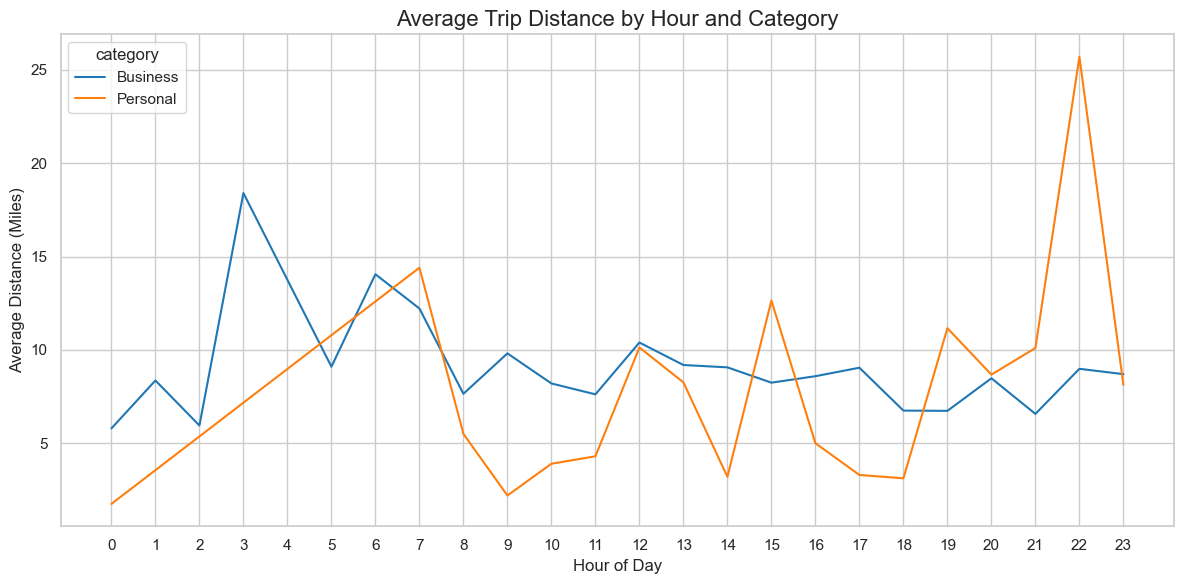

In [94]:
avg_dist_hour = df.groupby(['category', 'hour'])['miles_cleaned'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=avg_dist_hour, x='hour', y='miles_cleaned', hue='category', palette=['#1f77b4', '#ff7f0e'])
plt.title('Average Trip Distance by Hour and Category', fontsize=16)
plt.xlabel('Hour of Day')
plt.ylabel('Average Distance (Miles)')
plt.xticks(range(0,24))
plt.tight_layout()
plt.show()

# Correlation between Trip Distance and Duration

In [95]:
corr = df[['miles_cleaned', 'duration_min']].corr().loc['miles_cleaned', 'duration_min']
print(f"Pearson correlation between trip distance and duration: {corr:.3f}")

Pearson correlation between trip distance and duration: 0.472


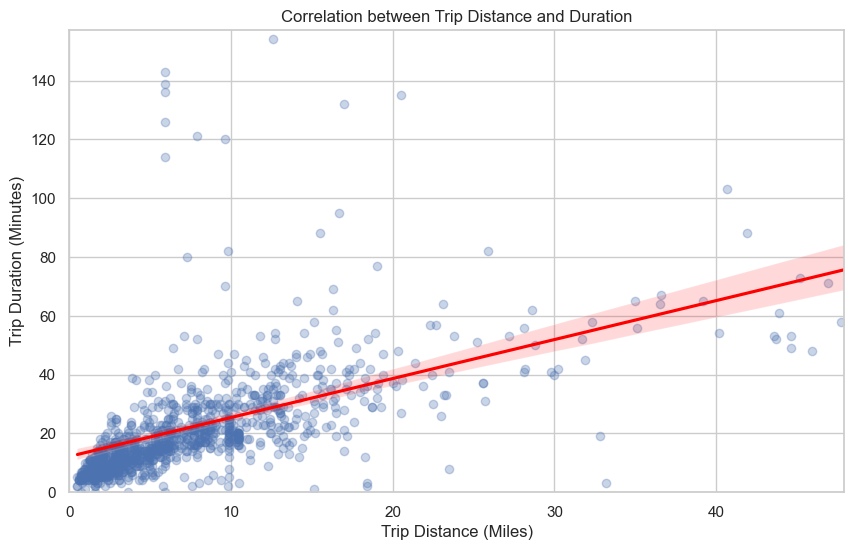

In [96]:
plt.figure(figsize=(10,6))
sns.regplot(x='miles_cleaned', y='duration_min', data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Correlation between Trip Distance and Duration')
plt.xlabel('Trip Distance (Miles)')
plt.ylabel('Trip Duration (Minutes)')
plt.xlim(0, df['miles_cleaned'].quantile(0.99))  
plt.ylim(0, df['duration_min'].quantile(0.99))  
plt.show()

# Trip Counts by Purpose

In [97]:
df['purpose'].value_counts()

purpose
Unknown            503
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: count, dtype: int64

In [99]:
purpose_counts = df['purpose'].value_counts().reset_index()
purpose_counts.columns = ['Purpose', 'Count']

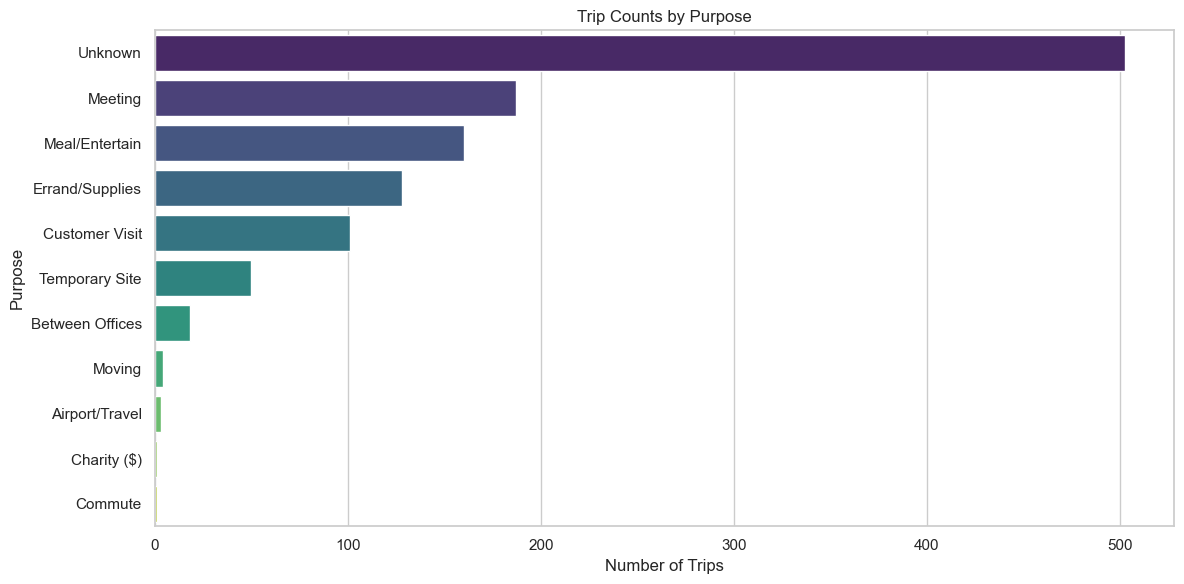

In [100]:
plt.figure(figsize=(12,6))
sns.barplot(x='Count', y='Purpose', data=purpose_counts, palette='viridis')
plt.title('Trip Counts by Purpose')
plt.xlabel('Number of Trips')
plt.ylabel('Purpose')
plt.tight_layout()
plt.show()

# Average Trip Duration by Purpose

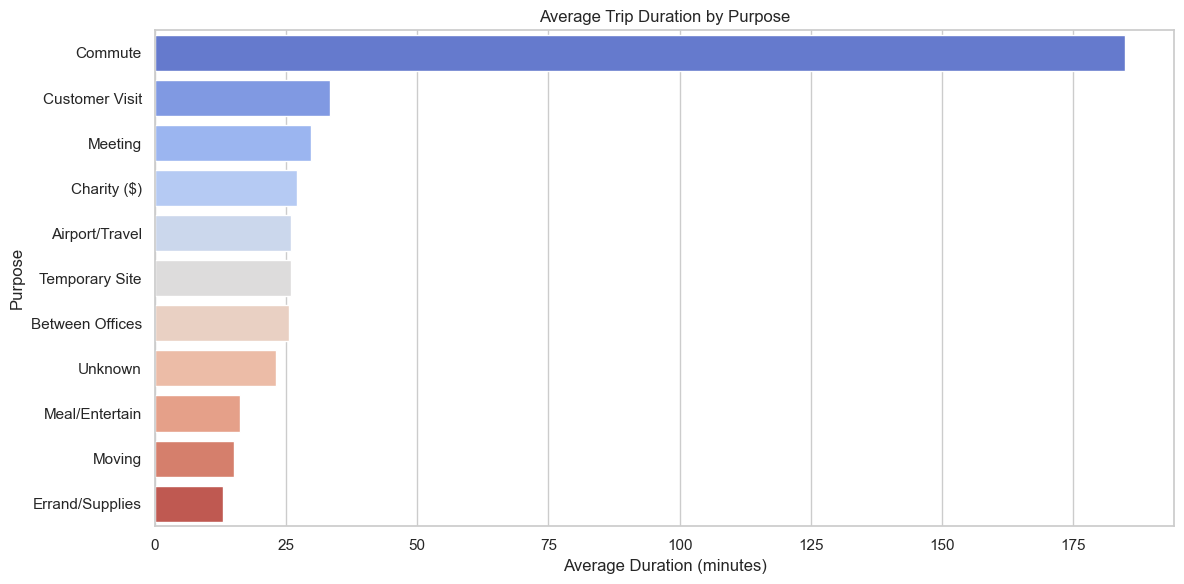

In [101]:
avg_duration_purpose = df.groupby('purpose')['duration_min'].mean().reset_index().sort_values('duration_min',
                                                                                              ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x='duration_min', y='purpose', data=avg_duration_purpose, palette='coolwarm')
plt.title('Average Trip Duration by Purpose')
plt.xlabel('Average Duration (minutes)')
plt.ylabel('Purpose')
plt.tight_layout()
plt.show()

# Trip Counts by Purpose over Days of Week

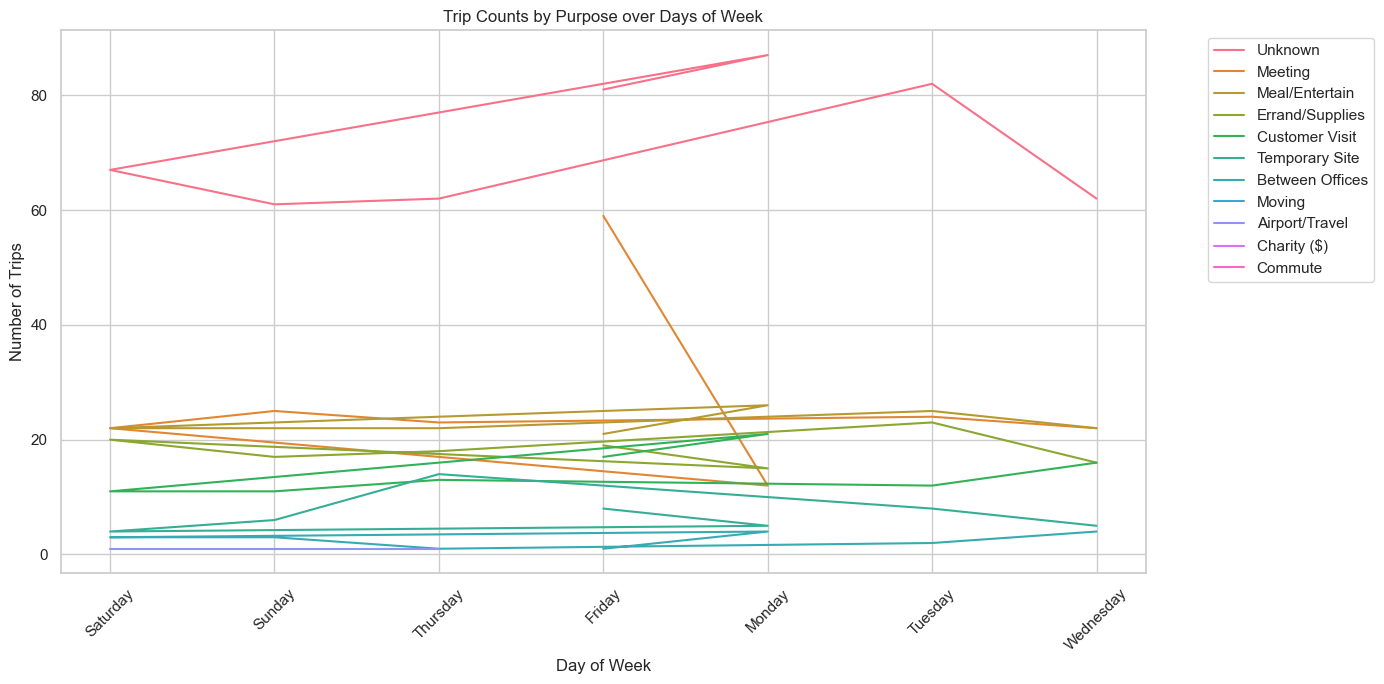

In [103]:
purpose_day = df.groupby(['purpose', 'day']).size().reset_index(name='trip_count')
plt.figure(figsize=(14,7))
sns.lineplot(data=purpose_day, x='day', y='trip_count', hue='purpose', 
             hue_order=purpose_counts['Purpose'], sort=False)
plt.title('Trip Counts by Purpose over Days of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()